<a href="https://colab.research.google.com/github/berma96/diplodatos/blob/main/Mentoria_TP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoría Ciencia de datos aplicada a la predicción de licencias médicas y comportamiento de los colaboradores

# Trabajo Práctico 1: Análisis y Visualización de Datos
### Trabajar con el csv denominado data.csv y resolver las siguientes consignas:

1. ¿Cuáles son las columnas relevantes del dataset?

2. ¿Qué tipo de variable es cada una? Asegurar que tengan el tipo de datos adecuado. Por ejemplo, para el caso de las fechas usar libreria datetime para su conversión.

3. Exploren si hay valores faltantes y/o nulos en el dataset.

4. A partir de la fecha de nacimiento calcular la edad del colaborador que solicita la licencia.

5. ¿Existen outliers en las variables seleccionadas?

6. Realicen un análisis estadístico de cada una de las variables numéricas: Cantidad de datos, mínimo, máximo, media, mediana, varianza, desviación estándar, cuartil 1, cuartil 3, rango intercuartílico.

  6a) Elijan una o dos variables categóricas, repetir este análisis y sacar conclusiones.

  6b) ¿El tiempo es una variable influyente en las distribuciones de estas variables? Ayudarse de gráficos para contestar esta pregunta.

7. Representen gráficamente cada variable numérica eligiendo el gráfico que considere apropiado. Consideren la posibilidad de generar rangos de datos para su análisis y representación gráfica de las variables.

  7a) Repitan los gráficos agrupando por una o dos variables categóricas y sacar conclusiones.

8. Presenten una tabla de frecuencias y porcentajes para las variables categóricas estado civil y edad.

9. Realicen un gráfico para representar la tabla construida en el punto 8.

10. En todas las consignas saquen conclusiones de lo observado.


In [ ]:
#Carga del dataset

import pandas as pd
url = 'https://raw.githubusercontent.com/MentoriaDiploDatos/Presentacion/main/data.csv'
df = pd.read_csv(url, sep=';')

<ipython-input-1-d9c9045b9cea>:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=';')


In [ ]:
df.columns

Index(['numero_licencia', 'fecha_creacion', 'dispositivo_acceso',
       'dias_solicitados', 'fecha_inicio', 'fecha_fin', 'diagnostico',
       'id_diagnostico', 'id_usuario', 'fecha_nacimiento', 'genero',
       'tipo_licencia', 'estado_civil', 'dias_aprobados', 'decision_medica',
       'id_auditor', 'motivo_rechazo', 'categoria_diagnostico'],
      dtype='object')

In [ ]:
df.sort_values(by='fecha_creacion', ascending=False).head(5)

,numero_licencia,fecha_creacion,dispositivo_acceso,dias_solicitados,fecha_inicio,fecha_fin,diagnostico,id_diagnostico,id_usuario,fecha_nacimiento,genero,tipo_licencia,estado_civil,dias_aprobados,decision_medica,id_auditor,motivo_rechazo,categoria_diagnostico
15277,430081,2022-12-30 23:43:46.340,APP,2.0,2022-12-30,2022-12-30,GASTROENTERITIS VIRAL,11.0,51234,1991-04-25,FEMALE,Médica,SINGLE,1.0,EDITAR_Y_APROBAR,6233.0,Se aprueba por menos dias,INFECCIONES
65254,430080,2022-12-30 23:31:38.631,APP,1.0,2022-12-30,2022-12-30,COLITIS Y GASTROENTERITIS NO INFECCIOSAS,6.0,45300,1982-05-19,MALE,Médica,OTHER,1.0,APROBAR,0.0,NaN,GASTROINTESTINAL
19949,430079,2022-12-30 23:02:21.609,WEB,1.0,2022-12-30,2022-12-30,GASTROENTERITIS VIRAL,11.0,72996,1995-06-07,FEMALE,Médica,OTHER,1.0,EDITAR_Y_APROBAR,6233.0,Se aprueba la licencia,INFECCIONES
116945,430078,2022-12-30 22:55:21.783,APP,2.0,2022-12-29,2022-12-30,INFLUENZA DEBIDO A VIRUS DE LA INFLUENZA IDENT...,23.0,38454,1974-12-30,FEMALE,Médica,OTHER,2.0,APROBAR,0.0,NaN,RESPIRATORIO
272260,430077,2022-12-30 22:37:25.036,APP,16.0,2022-12-30,2023-01-14,AMENAZA DE ABORTO,61.0,76782,2001-03-27,FEMALE,Médica,SINGLE,16.0,EDITAR_Y_APROBAR,186.0,Diagnostico no valido,PATOLOGIAS RELACIONADAS AL EMBARAZO Y FERTILIDAD


## 1. ¿Cuáles son las columnas relevantes del dataset?

Todas las columnas aportan informacion que puede ser interesante para el analisis de patrones y deteccion de fraudes. En mi opinion las mas relevantes son *'fecha_creacion', 'dias_solicitados', 'fecha_inicio', 'diagnostico', 'decision_medica', 'motivo_rechazo'* y *'categoria_diagnostico'*

## 2. ¿Qué tipo de variable es cada una? Asegurar que tengan el tipo de datos adecuado. Por ejemplo, para el caso de las fechas usar libreria datetime para su conversión.

In [ ]:
#Check de tipos de datos
df.dtypes

numero_licencia            int64
fecha_creacion            object
dispositivo_acceso        object
dias_solicitados         float64
fecha_inicio              object
fecha_fin                 object
diagnostico               object
id_diagnostico           float64
id_usuario                 int64
fecha_nacimiento          object
genero                    object
tipo_licencia             object
estado_civil              object
dias_aprobados           float64
decision_medica           object
id_auditor               float64
motivo_rechazo            object
categoria_diagnostico     object
dtype: object

In [ ]:
# Modificacion de tipos de datos de algunas columnas

# Convertir campos de fecha a tipo datetime
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'])
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'])
df['fecha_fin'] = pd.to_datetime(df['fecha_fin'])
df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'])
df['decision_medica'] = df['decision_medica'].astype(str)
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

In [ ]:
#Nuevo Check
df.dtypes

numero_licencia                   int64
fecha_creacion           datetime64[ns]
dispositivo_acceso               object
dias_solicitados                float64
fecha_inicio             datetime64[ns]
fecha_fin                datetime64[ns]
diagnostico                      object
id_diagnostico                  float64
id_usuario                        int64
fecha_nacimiento         datetime64[ns]
genero                           object
tipo_licencia                    object
estado_civil                     object
dias_aprobados                  float64
decision_medica                  object
id_auditor                      float64
motivo_rechazo                   object
categoria_diagnostico            object
dtype: object

## 3. Exploren si hay valores faltantes y/o nulos en el dataset.

In [ ]:
# Calcular la cantidad total de datos por variable
total_datos = df.count()

# Calcular la cantidad de valores nulos por variable
valores_nulos = df.isnull().sum()

# Crear un nuevo DataFrame con las dos series anteriores
info_variable = pd.DataFrame({'Valores Nulos': valores_nulos, 'Con Datos': total_datos, 'Total Datos': total_datos + valores_nulos, '% Datos': total_datos/(total_datos + valores_nulos)*100 })

# Mostrar la información de las variables
print(info_variable)

                       Valores Nulos  Con Datos  Total Datos     % Datos
numero_licencia                    0     430081       430081  100.000000
fecha_creacion                     0     430081       430081  100.000000
dispositivo_acceso                 0     430081       430081  100.000000
dias_solicitados                6035     424046       430081   98.596776
fecha_inicio                       0     430081       430081  100.000000
fecha_fin                          1     430080       430081   99.999767
diagnostico                        0     430081       430081  100.000000
id_diagnostico                157021     273060       430081   63.490366
id_usuario                         0     430081       430081  100.000000
fecha_nacimiento                   0     430081       430081  100.000000
genero                             0     430081       430081  100.000000
tipo_licencia                      0     430081       430081  100.000000
estado_civil                       0     430081    

En este caso, tiene sentido que 'motivo_rechazo' tenga el menor porcentaje de datos, ya que solo se llena en el caso de que exista un rechazo.
En cambio id_diagnostico y categoria_diagnostico comparten un porcentaje bajo ya que esta informacion no se empezo a agregar hasta mas adelante en el analisis.
Fuera de los datos nulos, tambien note que en algunos casos las fechas de inicio y las fechas de finalizacion de las licencias no coincide

## 4. A partir de la fecha de nacimiento calcular la edad del colaborador que solicita la licencia.

In [ ]:
from datetime import datetime

# Obtener la fecha actual
fecha_actual = pd.to_datetime(datetime.now().strftime('%Y-%m-%d'))

# Calcular la edad restando la fecha actual a la fecha de nacimiento
df['edad'] = (fecha_actual - df['fecha_nacimiento']).astype('<m8[Y]')

# Imprimir el dataframe resultante
df.sort_values(by='fecha_creacion', ascending=False).head(5)

,numero_licencia,fecha_creacion,dispositivo_acceso,dias_solicitados,fecha_inicio,fecha_fin,diagnostico,id_diagnostico,id_usuario,fecha_nacimiento,genero,tipo_licencia,estado_civil,dias_aprobados,decision_medica,id_auditor,motivo_rechazo,categoria_diagnostico,edad
15277,430081,2022-12-30 23:43:46.340,APP,2.0,2022-12-30,2022-12-30,GASTROENTERITIS VIRAL,11.0,51234,1991-04-25,FEMALE,Médica,SINGLE,1.0,EDITAR_Y_APROBAR,6233.0,Se aprueba por menos dias,INFECCIONES,32.0
65254,430080,2022-12-30 23:31:38.631,APP,1.0,2022-12-30,2022-12-30,COLITIS Y GASTROENTERITIS NO INFECCIOSAS,6.0,45300,1982-05-19,MALE,Médica,OTHER,1.0,APROBAR,0.0,NaN,GASTROINTESTINAL,41.0
19949,430079,2022-12-30 23:02:21.609,WEB,1.0,2022-12-30,2022-12-30,GASTROENTERITIS VIRAL,11.0,72996,1995-06-07,FEMALE,Médica,OTHER,1.0,EDITAR_Y_APROBAR,6233.0,Se aprueba la licencia,INFECCIONES,28.0
116945,430078,2022-12-30 22:55:21.783,APP,2.0,2022-12-29,2022-12-30,INFLUENZA DEBIDO A VIRUS DE LA INFLUENZA IDENT...,23.0,38454,1974-12-30,FEMALE,Médica,OTHER,2.0,APROBAR,0.0,NaN,RESPIRATORIO,48.0
272260,430077,2022-12-30 22:37:25.036,APP,16.0,2022-12-30,2023-01-14,AMENAZA DE ABORTO,61.0,76782,2001-03-27,FEMALE,Médica,SINGLE,16.0,EDITAR_Y_APROBAR,186.0,Diagnostico no valido,PATOLOGIAS RELACIONADAS AL EMBARAZO Y FERTILIDAD,22.0


In [ ]:
moda_edad = df['edad'].mode()
df['edad'].value_counts()[moda_edad]


41.0    15803
Name: edad, dtype: int64

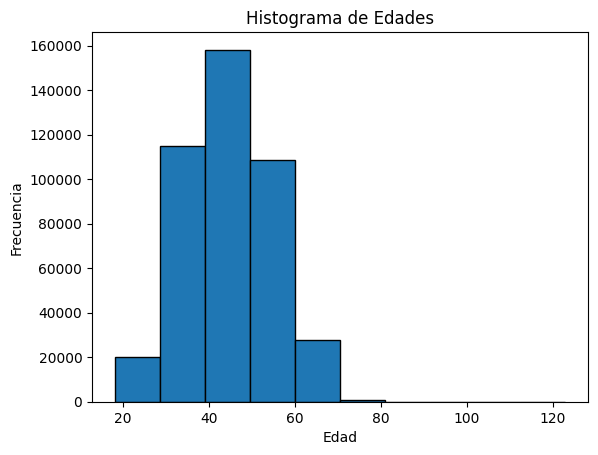

In [ ]:
import matplotlib.pyplot as plt

# Crear el histograma de la columna 'edad'
plt.hist(df['edad'], bins=10, edgecolor='black')

# Configurar los títulos y etiquetas
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

## 5. ¿Existen outliers en las variables seleccionadas?

 Variables: 'fecha_creacion', 'dias_solicitados', 'fecha_inicio', 'diagnostico', 'decision_medica', 'motivo_rechazo', 'dias_aprobados' y 'categoria_diagnostico'

In [ ]:
import numpy as np

# Obtener los valores únicos de la columna 'dias_solicitados'
vu_dias = df['dias_solicitados'].unique()
vu_dias_ord = np.sort(vu_dias)

# Imprimir los valores únicos
print("Valores únicos para la columna 'dias_solicitados':")
print(vu_dias_ord)

Valores únicos para la columna 'dias_solicitados':
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  58.  60.  61.  62.  64.  67.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  78.  79.  80.  84.  85.  87.  88.  90.  91.  96.  99. 100.
 106. 110. 111. 114. 120. 123. 125. 131. 146. 160. 168. 180. 183. 185.
 194. 196. 204. 210. 215. 222. 233. 243. 249. 250. 286. 300. 365.  nan]


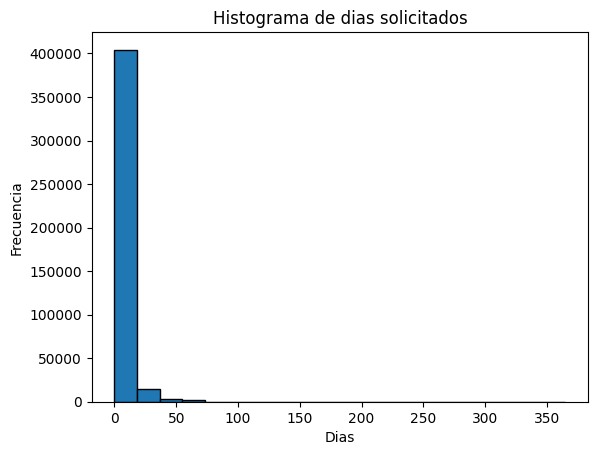

In [ ]:
plt.hist(df['dias_solicitados'], bins=20, edgecolor='black')

# Configurar los títulos y etiquetas
plt.title('Histograma de dias solicitados')
plt.xlabel('Dias')
plt.ylabel('Frecuencia')

plt.show()

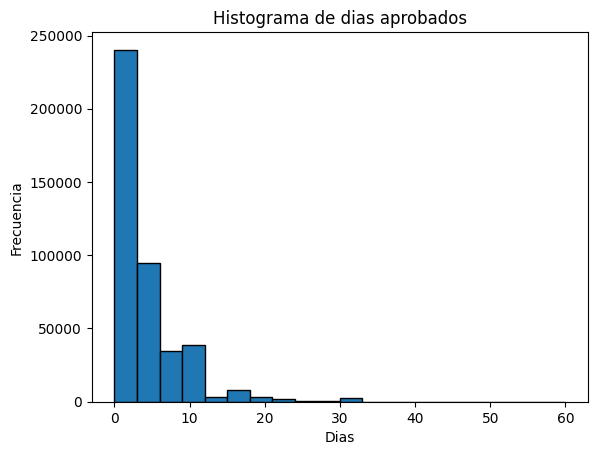

In [ ]:
plt.hist(df['dias_aprobados'], bins=20, edgecolor='black')

# Configurar los títulos y etiquetas
plt.title('Histograma de dias aprobados')
plt.xlabel('Dias')
plt.ylabel('Frecuencia')

plt.show()

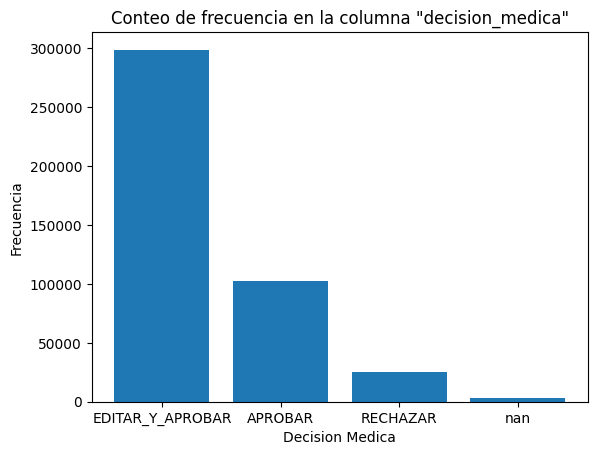

In [ ]:
# Realizar el conteo de frecuencia en la columna 'decision_medica'
conteo_decision = df['decision_medica'].value_counts()

# Crear un gráfico de barras para mostrar el conteo de frecuencia
plt.bar(conteo_decision.index, conteo_decision.values)

# Configurar los títulos y etiquetas
plt.title('Conteo de frecuencia en la columna "decision_medica"')
plt.xlabel('Decision Medica')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [ ]:
# Realizar el conteo de frecuencia en la columna 'decision_medica'
conteo_rechazo = df['motivo_rechazo'].value_counts()

print(conteo_rechazo)

Se aprueba la licencia                             145908
Se aprueba por menos dias                           22993
La documentacion adjuntada no cumple requisitos     12410
Diagnostico no valido                                4074
Motivos formales                                     1902
Otros motivos                                         413
Ausente a turno                                       114
Name: motivo_rechazo, dtype: int64


Como se puede observar, los outliers se encuentran sobre todo en los dias solicitados, pero tambien existen en la columna 'edad'. Tambien seria interesante revisar los casos donde los dias aprobados son mayores a 20 dias.

Columnas como fecha_creacion, fecha_inicio, diagnostico y categoria_diagnostico no tienen outliers

# 6.  Realicen un análisis estadístico de cada una de las variables numéricas: Cantidad de datos, mínimo, máximo, media, mediana, varianza, desviación estándar, cuartil 1, cuartil 3, rango intercuartílico.

  6a) Elijan una o dos variables categóricas, repetir este análisis y sacar conclusiones.

  6b) ¿El tiempo es una variable influyente en las distribuciones de estas variables? Ayudarse de gráficos para contestar esta pregunta.


In [ ]:
# Eliminar los valores faltantes (NaN) en la columna 'dias_solicitados'
dias_solicitados = df['dias_solicitados']
dias_solicitados_sin_nan = dias_solicitados.dropna()

#Describe de dias_solicitados
dias_solicitados.describe()

count    424046.000000
mean          5.386963
std           8.384523
min           0.000000
25%           2.000000
50%           3.000000
75%           7.000000
max         365.000000
Name: dias_solicitados, dtype: float64

In [ ]:
# Calcular el percentil 25 (Q1) y el percentil 75 (Q3) de la columna sin valores faltantes
dias_solicitados_q1 = np.percentile(dias_solicitados_sin_nan, 25)
dias_solicitados_q3 = np.percentile(dias_solicitados_sin_nan, 75)
iqr_dias_solicitados = dias_solicitados_q3 - dias_solicitados_q1

print("Rango intercuartílico (IQR) de 'dias_solicitados':", iqr_dias_solicitados)

Rango intercuartílico (IQR) de 'dias_solicitados': 5.0


In [ ]:
# Eliminar los valores faltantes (NaN) en la columna 'dias_aprobados'
dias_aprobados = df['dias_aprobados']
dias_aprobados_sin_nan = dias_aprobados.dropna()

dias_aprobados.describe()

count    427003.000000
mean          3.879624
std           4.416187
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max          60.000000
Name: dias_aprobados, dtype: float64

In [ ]:
# Calcular el percentil 25 (Q1) y el percentil 75 (Q3) de la columna sin valores faltantes
dias_aprobados_q1 = np.percentile(dias_aprobados_sin_nan, 25)
dias_aprobados_q3 = np.percentile(dias_aprobados_sin_nan, 75)
iqr_dias_aprobados = dias_aprobados_q3 - dias_aprobados_q1

print("Rango intercuartílico (IQR) de 'dias_solicitados':", iqr_dias_aprobados)

Rango intercuartílico (IQR) de 'dias_solicitados': 4.0


In [ ]:
#Describe de 'Edad'
df['edad'].describe()

count    430081.000000
mean         44.286795
std           9.989044
min          18.000000
25%          37.000000
50%          44.000000
75%          52.000000
max         123.000000
Name: edad, dtype: float64

In [ ]:
# Calcular el percentil 25 (Q1) y el percentil 75 (Q3) de la columna
edad_q1 = np.percentile(df['edad'], 25)
edad_q3 = np.percentile(df['edad'], 75)
iqr_edad = edad_q3 - edad_q1

print("Rango intercuartílico (IQR) de 'edad':", iqr_edad)

Rango intercuartílico (IQR) de 'edad': 15.0


## 6a) Elijan una o dos variables categóricas, repetir este análisis y sacar conclusiones.

In [ ]:
df['diagnostico'].describe()

count                430081
unique                 1314
top       CONTACTO ESTRECHO
freq                  70215
Name: diagnostico, dtype: object

In [ ]:
df['genero'].describe()

count     430081
unique         3
top       FEMALE
freq      333693
Name: genero, dtype: object

In [ ]:
df['genero'].unique()

array(['FEMALE', 'MALE', 'OTHER'], dtype=object)

Podemos encontrar un dato esperado cuando analizamos la variable categorica 'diagnostico' ya que los datos analizados son del periodo de la pandemia. Por eso encontramos que el Contacto Estrecho es el mayor causante de creacion de licencias. Tambien podemos ver que de un total de 430081 casos, casi el 80% son creados por Mujeres, esto puede deberse a que la planta esta compuesta en su mayoria por las mismas.

## 6b)¿El tiempo es una variable influyente en las distribuciones de estas variables? Ayudarse de gráficos para contestar esta pregunta.

In [ ]:
#En base a fecha_creacion creo 3 columnas dia_creacion, mes_creacion, estacion_creacion

# Crear la columna 'dia_creacion' con el día de la semana en texto
df['dia_creacion'] = df['fecha_creacion'].dt.day_name()

# Crear la columna 'mes_creacion' con el mes en texto
df['mes_creacion'] = df['fecha_creacion'].dt.month_name()

# Crear la columna 'estacion_creacion' según el hemisferio sur
df['estacion_creacion'] = df['fecha_creacion'].dt.month.apply(lambda x: 'Verano' if 1 <= x <= 2 or 12 == x else
                                                                 'Otoño' if 3 <= x <= 5 else
                                                                 'Invierno' if 6 <= x <= 8 else
                                                                 'Primavera')
df.sort_values(by='fecha_creacion', ascending=False).head(5)

,numero_licencia,fecha_creacion,dispositivo_acceso,dias_solicitados,fecha_inicio,fecha_fin,diagnostico,id_diagnostico,id_usuario,fecha_nacimiento,...,estado_civil,dias_aprobados,decision_medica,id_auditor,motivo_rechazo,categoria_diagnostico,edad,dia_creacion,mes_creacion,estacion_creacion
15277,430081,2022-12-30 23:43:46.340,APP,2.0,2022-12-30,2022-12-30,GASTROENTERITIS VIRAL,11.0,51234,1991-04-25,...,SINGLE,1.0,EDITAR_Y_APROBAR,6233.0,Se aprueba por menos dias,INFECCIONES,32.0,Friday,December,Verano
65254,430080,2022-12-30 23:31:38.631,APP,1.0,2022-12-30,2022-12-30,COLITIS Y GASTROENTERITIS NO INFECCIOSAS,6.0,45300,1982-05-19,...,OTHER,1.0,APROBAR,0.0,NaN,GASTROINTESTINAL,41.0,Friday,December,Verano
19949,430079,2022-12-30 23:02:21.609,WEB,1.0,2022-12-30,2022-12-30,GASTROENTERITIS VIRAL,11.0,72996,1995-06-07,...,OTHER,1.0,EDITAR_Y_APROBAR,6233.0,Se aprueba la licencia,INFECCIONES,28.0,Friday,December,Verano
116945,430078,2022-12-30 22:55:21.783,APP,2.0,2022-12-29,2022-12-30,INFLUENZA DEBIDO A VIRUS DE LA INFLUENZA IDENT...,23.0,38454,1974-12-30,...,OTHER,2.0,APROBAR,0.0,NaN,RESPIRATORIO,48.0,Friday,December,Verano
272260,430077,2022-12-30 22:37:25.036,APP,16.0,2022-12-30,2023-01-14,AMENAZA DE ABORTO,61.0,76782,2001-03-27,...,SINGLE,16.0,EDITAR_Y_APROBAR,186.0,Diagnostico no valido,PATOLOGIAS RELACIONADAS AL EMBARAZO Y FERTILIDAD,22.0,Friday,December,Verano


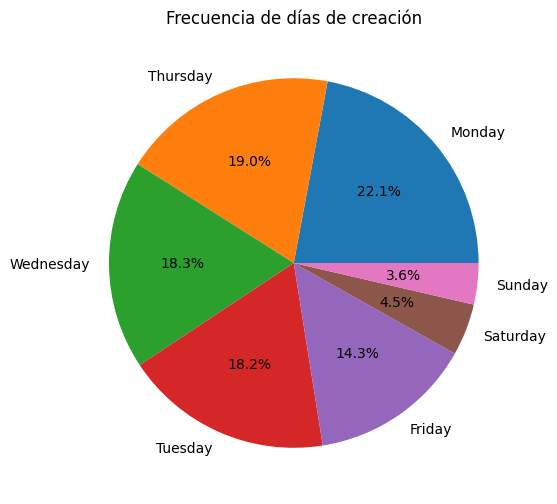

In [ ]:
# Calcular la frecuencia de cada día de la semana en la columna 'dia_creacion'
frecuencia_dia_creacion = df['dia_creacion'].value_counts()

# Crear el gráfico de tipo "pie"
plt.figure(figsize=(8, 6))
plt.pie(frecuencia_dia_creacion, labels=frecuencia_dia_creacion.index, autopct='%1.1f%%')
plt.title('Frecuencia de días de creación')

# Mostrar el gráfico
plt.show()

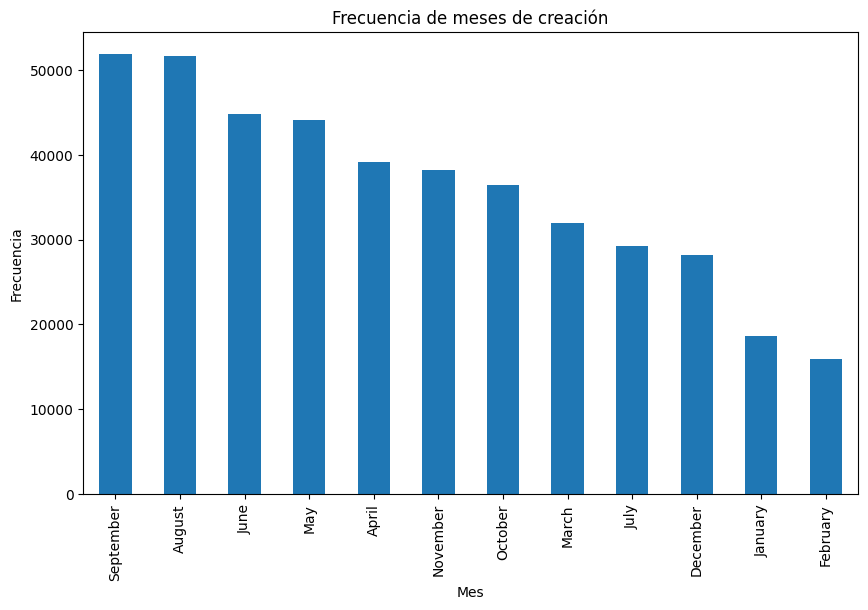

In [ ]:
# Calcular la frecuencia de cada mes en la columna 'mes_creacion'
frecuencia_meses = df['mes_creacion'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_meses.plot(kind='bar')
plt.title('Frecuencia de meses de creación')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

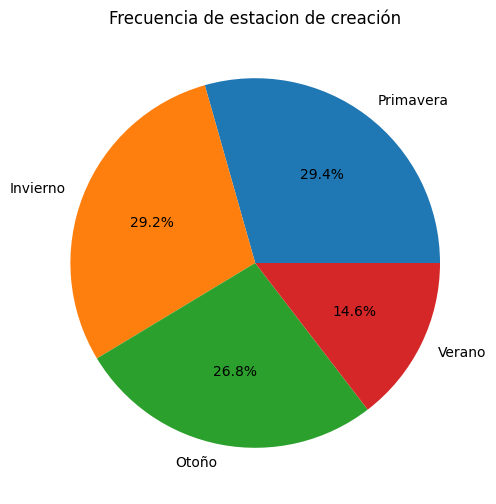

In [ ]:
# Calcular la frecuencia de cada día de la semana en la columna 'dia_creacion'
frecuencia_estacion_creacion = df['estacion_creacion'].value_counts()

# Crear el gráfico de tipo "pie"
plt.figure(figsize=(8, 6))
plt.pie(frecuencia_estacion_creacion, labels=frecuencia_estacion_creacion.index, autopct='%1.1f%%')
plt.title('Frecuencia de estacion de creación')

# Mostrar el gráfico
plt.show()

Podemos concluir que el tiempo si es influyente en la creacion de licencias, sobre todo podemos destacar que la mayoria de las licencias se crean en Agosto y Septiembre, mientras que la menor cantidad de casos se crea entre Enero y Febrero.
En cuanto a dias, el dia mas popular es el lunes, mientras que el sabado y domingo son los de menor porcentaje, pero puede ser debido a que son dias no laborales.

# 7. Representen gráficamente cada variable numérica eligiendo el gráfico que considere apropiado. Consideren la posibilidad de generar rangos de datos para su análisis y representación gráfica de las variables.

7a) Repitan los gráficos agrupando por una o dos variables categóricas y sacar conclusiones.

In [ ]:
#Vamos a agrupar las variables numericas en distintos rangos

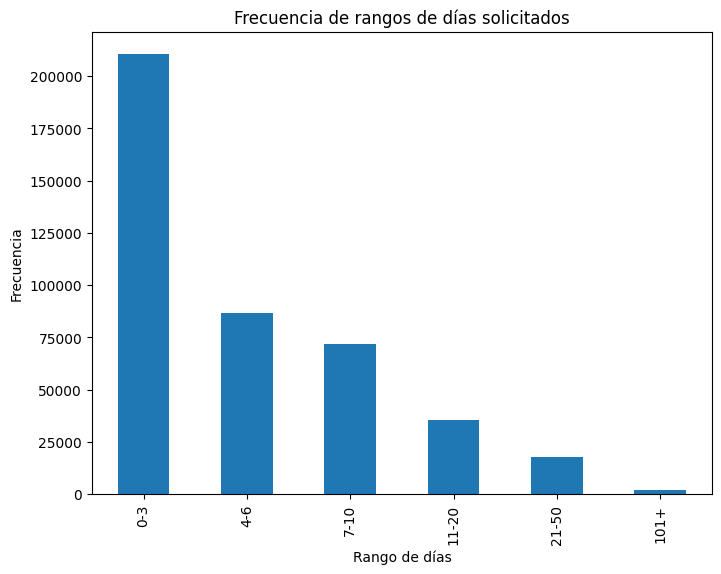

In [ ]:
#Dias Solicitados
# Definir los límites de los rangos
limites = [0, 3, 6, 10, 20, 50, float('inf')]

# Definir las etiquetas para los rangos
etiquetas_ds = ['0-3', '4-6', '7-10', '11-20','21-50', '101+']

# Crear la columna 'rango_dias_solicitados' con los rangos correspondientes
df['rango_dias_solicitados'] = pd.cut(df['dias_solicitados'], bins=limites, labels=etiquetas_ds, right=False)

frecuencia_rangos_dias_solicitados = df['rango_dias_solicitados'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
frecuencia_rangos_dias_solicitados.plot(kind='bar')
plt.title('Frecuencia de rangos de días solicitados')
plt.xlabel('Rango de días')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

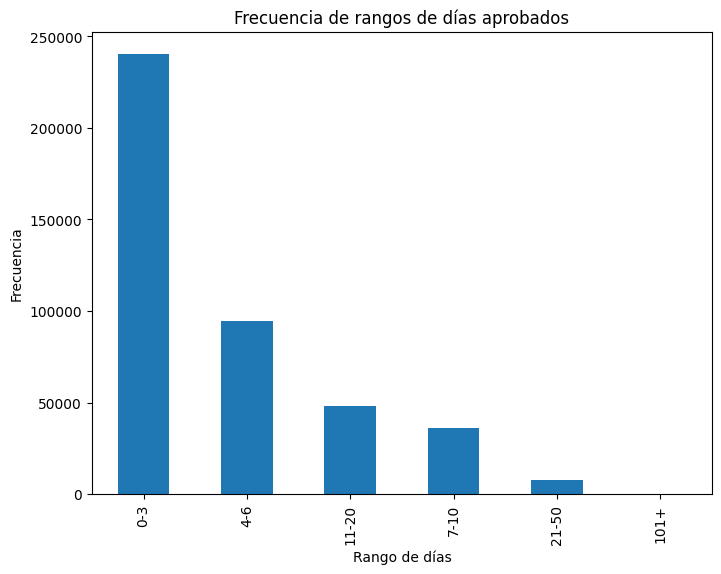

In [ ]:
#Dias Aprobados
# Definir los límites de los rangos
limites = [0, 3, 6, 10, 20, 50, float('inf')]

# Definir las etiquetas para los rangos
etiquetas_da = ['0-3', '4-6', '7-10', '11-20','21-50', '101+']

# Crear la columna 'rango_dias_solicitados' con los rangos correspondientes
df['rango_dias_aprobados'] = pd.cut(df['dias_aprobados'], bins=limites, labels=etiquetas_da, right=False)

frecuencia_rangos_dias_aprobados = df['rango_dias_aprobados'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
frecuencia_rangos_dias_aprobados.plot(kind='bar')
plt.title('Frecuencia de rangos de días aprobados')
plt.xlabel('Rango de días')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

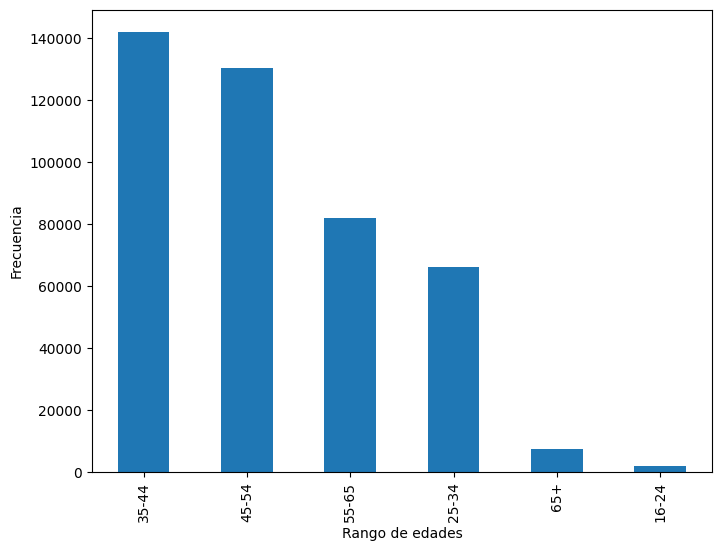

In [ ]:
#Edad
# Definir los límites de los rangos
limites_edad = [16, 24, 34, 44, 54, 65, float('inf')]

# Definir las etiquetas para los rangos
etiquetas_edad = ['16-24', '25-34', '35-44', '45-54','55-65', '65+']

# Crear la columna 'rango_dias_solicitados' con los rangos correspondientes
df['rango_edad'] = pd.cut(df['edad'], bins=limites_edad, labels=etiquetas_edad, right=False)

frecuencia_rangos_edad = df['rango_edad'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
frecuencia_rangos_edad.plot(kind='bar')
plt.xlabel('Rango de edades')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

## 7a) Repitan los gráficos agrupando por una o dos variables categóricas y sacar conclusiones.

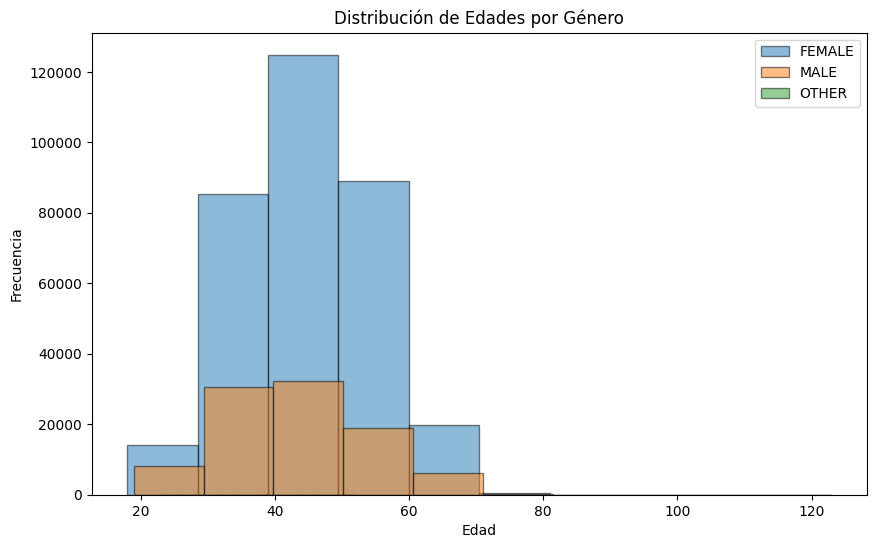

In [ ]:
# Agrupar los datos por género
grupos_genero = df.groupby('genero')

# Crear un histograma separado para cada grupo
plt.figure(figsize=(10, 6))
for genero, grupo in grupos_genero:
    plt.hist(grupo['edad'], bins=10, edgecolor='black', alpha=0.5, label=genero)

plt.title('Distribución de Edades por Género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

In [ ]:
# Contar los valores para cada grupo de género
for genero, grupo in grupos_genero:
    conteo_valores = grupo['genero'].value_counts()
    print(f"Grupo {genero}:")
    print(conteo_valores)
    print()

Grupo FEMALE:
FEMALE    333693
Name: genero, dtype: int64

Grupo MALE:
MALE    96347
Name: genero, dtype: int64

Grupo OTHER:
OTHER    41
Name: genero, dtype: int64



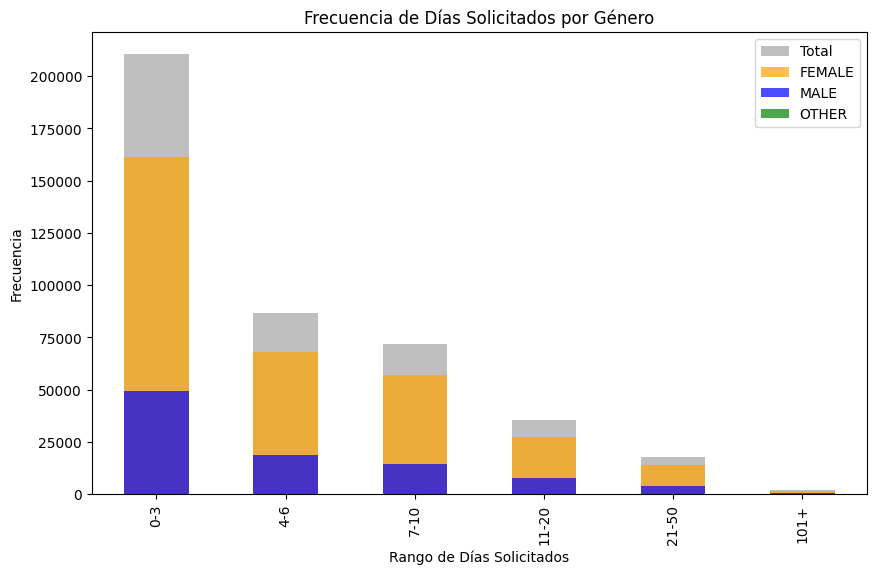

In [ ]:
# Definir los límites de los rangos
limites = [0, 3, 6, 10, 20, 50, float('inf')]

# Definir las etiquetas para los rangos
etiquetas_ds = ['0-3', '4-6', '7-10', '11-20','21-50', '101+']

# Crear la columna 'rangos_ds' utilizando pd.cut()
df['rangos_ds'] = pd.cut(df['dias_solicitados'], bins=limites, labels=etiquetas_ds, right=False)

# Agrupar los datos por género y 'rangos_ds', y contar la frecuencia en cada grupo
frecuencia_por_genero = df.groupby(['genero', 'rangos_ds']).size().unstack()

# Sumar los valores de cada género
frecuencia_total = frecuencia_por_genero.sum()

# Crear un diccionario de colores para cada género
colores = {'FEMALE': 'orange', 'MALE': 'blue', 'OTHER': 'green'}

# Crear un gráfico de barras con los valores totales
frecuencia_total.plot(kind='bar', figsize=(10, 6), color='gray', alpha=0.5, label='Total')

# Crear un gráfico de barras para cada género y superponerlos
for genero in frecuencia_por_genero.index:
    frecuencia_por_genero.loc[genero].plot(kind='bar', figsize=(10, 6), alpha=0.7, color=colores[genero], label=genero)

# Configurar los títulos y etiquetas de los ejes
plt.title('Frecuencia de Días Solicitados por Género')
plt.xlabel('Rango de Días Solicitados')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

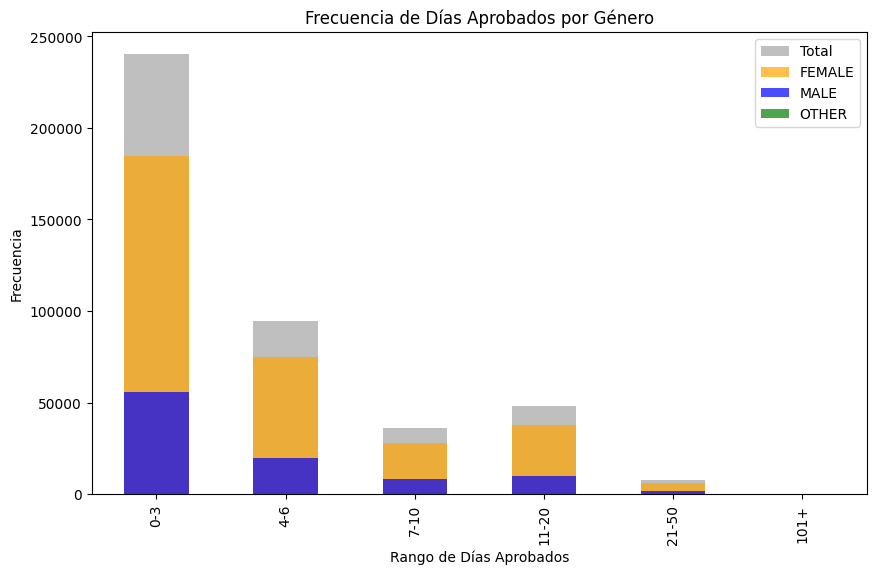

In [ ]:
# Definir los límites de los rangos
limites = [0, 3, 6, 10, 20, 50, float('inf')]

# Definir las etiquetas para los rangos
etiquetas_ds = ['0-3', '4-6', '7-10', '11-20','21-50', '101+']

# Crear la columna 'rangos_ds' utilizando pd.cut()
df['rangos_da'] = pd.cut(df['dias_aprobados'], bins=limites, labels=etiquetas_ds, right=False)

# Agrupar los datos por género y 'rangos_ds', y contar la frecuencia en cada grupo
aprobados_por_genero = df.groupby(['genero', 'rangos_da']).size().unstack()

# Sumar los valores de cada género
aprobados_total = aprobados_por_genero.sum()

# Crear un gráfico de barras con los valores totales
aprobados_total.plot(kind='bar', figsize=(10, 6), color='gray', alpha=0.5, label='Total')

# Crear un gráfico de barras para cada género y superponerlos
for genero in aprobados_por_genero.index:
    aprobados_por_genero.loc[genero].plot(kind='bar', figsize=(10, 6), alpha=0.7, color=colores[genero], label=genero)

# Configurar los títulos y etiquetas de los ejes
plt.title('Frecuencia de Días Aprobados por Género')
plt.xlabel('Rango de Días Aprobados')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()

#8. Presenten una tabla de frecuencias y porcentajes para las variables categóricas estado civil y edad.

In [ ]:
df_filtrado = df[df['estado_civil'] != 'OTHER']

In [ ]:
# Calcular la frecuencia y porcentaje para la variable "estado civil"
frecuencia_estado_civil = df_filtrado['estado_civil'].value_counts()
porcentaje_estado_civil = df_filtrado['estado_civil'].value_counts(normalize=True) * 100

# Crear la tabla de frecuencias y porcentajes para "estado civil"
tabla_estado_civil = pd.DataFrame({
    'Frecuencia': frecuencia_estado_civil,
    'Porcentaje': porcentaje_estado_civil
})

# Mostrar la tabla de frecuencias y porcentajes para "estado civil"
print(tabla_estado_civil)

                      Frecuencia  Porcentaje
SINGLE                    128193   63.012992
MARRIED                    56348   27.697737
DIVORCED                    6520    3.204892
DOMESTIC_UNION              5556    2.731040
PERMANENT_SEPARATED         1855    0.911821
LEGALLY_SEPARATED           1827    0.898058
CIVIL_UNION                 1199    0.589366
WIDOWED                     1001    0.492039
DOMESTIC_PARTNERSHIP         519    0.255113
SEPARATED                    421    0.206942


In [ ]:
# Calcular la frecuencia y porcentaje para la variable "rango_edad"
frecuencia_rango_edad = df_filtrado['rango_edad'].value_counts()
porcentaje_rango_edad = df_filtrado['rango_edad'].value_counts(normalize=True) * 100

# Crear la tabla de frecuencias y porcentajes para "rango_edad"
tabla_rango_edad = pd.DataFrame({
    'Frecuencia': frecuencia_rango_edad,
    'Porcentaje': porcentaje_rango_edad
})

# Ordenar la tabla por los rangos de edad definidos
tabla_rango_edad = tabla_rango_edad.reindex(rangos_edad)

# Mostrar la tabla de frecuencias y porcentajes para "rango_edad"
print(tabla_rango_edad)

       Frecuencia  Porcentaje
16-24         777    0.381933
25-34       38700   19.022901
35-44       79630   39.141954
45-54       55658   27.358569
55-65       26615   13.082546
65+          2059    1.012097


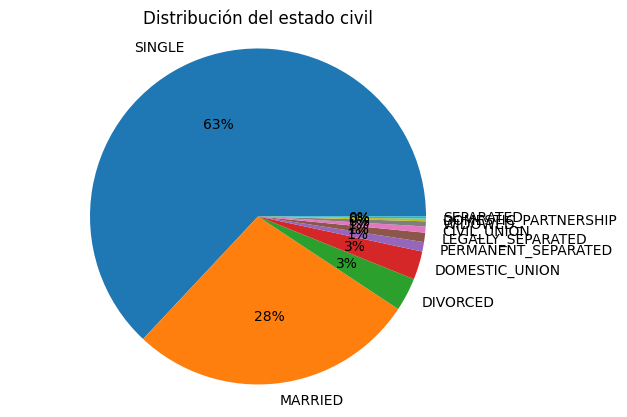

In [ ]:
# Crear el gráfico de torta estado civil
plt.pie(frecuencia_estado_civil, labels=frecuencia_estado_civil.index, autopct='%1.0f%%')
plt.title('Distribución del estado civil')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

In [ ]:
# Filtrar el DataFrame excluyendo la categoría 'other' en estado civil
df_filtrado = df[df['estado_civil'] != 'OTHER']

# Calcular las frecuencias de estado civil por rango de edad en el DataFrame filtrado
frecuencia_estado_civil = df_filtrado.groupby(['rango_edad', 'estado_civil']).size().unstack(fill_value=0)

# Calcular los totales por rango de edad
total_por_rango_edad = frecuencia_estado_civil.sum(axis=1)

# Calcular los porcentajes de estado civil por rango de edad
porcentaje_estado_civil = frecuencia_estado_civil.div(total_por_rango_edad, axis=0) * 100

# Encontrar el estado civil más frecuente y el porcentaje correspondiente para cada rango de edad
estado_civil_mas_frecuente = frecuencia_estado_civil.idxmax(axis=1)
porcentaje_estado_civil_mas_frecuente = porcentaje_estado_civil.max(axis=1)

# Crear la tabla final
tabla_estado_civil_mas_frecuente_porcentaje = pd.DataFrame({'Estado Civil Más Frecuente': estado_civil_mas_frecuente, 'Porcentaje': porcentaje_estado_civil_mas_frecuente})

# Mostrar la tabla final
print(tabla_estado_civil_mas_frecuente_porcentaje)

           Estado Civil Más Frecuente  Porcentaje
rango_edad                                       
16-24                          SINGLE   99.613900
25-34                          SINGLE   94.682171
35-44                          SINGLE   77.743313
45-54                         MARRIED   45.680765
55-65                         MARRIED   57.306030
65+                           MARRIED   67.119961


#9. Realicen un gráfico para representar la tabla construida en el punto 8.

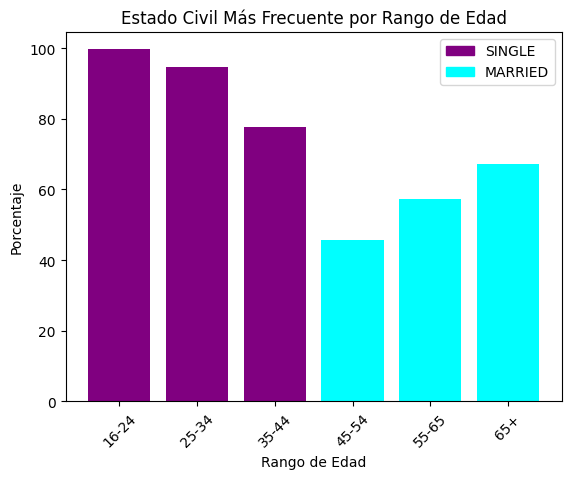

In [ ]:

# Obtener los datos de la tabla
rangos_edad = tabla_estado_civil_mas_frecuente_porcentaje.index
estado_civil_mas_frecuente = tabla_estado_civil_mas_frecuente_porcentaje['Estado Civil Más Frecuente']
porcentaje_estado_civil_mas_frecuente = tabla_estado_civil_mas_frecuente_porcentaje['Porcentaje']

# Definir un diccionario de colores basado en los valores únicos de estado civil más frecuente
colores = {'SINGLE': 'purple', 'MARRIED': 'cyan'}

# Crear la figura y los ejes del gráfico
fig, ax = plt.subplots()

# Generar el gráfico de barras y asignar colores según el estado civil más frecuente
ax.bar(rangos_edad, porcentaje_estado_civil_mas_frecuente, color=[colores[estado] for estado in estado_civil_mas_frecuente])

# Agregar etiquetas y título
ax.set_xlabel('Rango de Edad')
ax.set_ylabel('Porcentaje')
ax.set_title('Estado Civil Más Frecuente por Rango de Edad')

# Rotar las etiquetas del eje x
ax.tick_params(axis='x', rotation=45)

# Crear la leyenda con colores
handles = [plt.Rectangle((0,0),1,1, color=colores[estado]) for estado in colores]
labels = colores.keys()
ax.legend(handles, labels)


# Mostrar el gráfico
plt.show()